### **Keypoint Detection**

### Sift

In [1]:
import cv2 as cv
import numpy as np
import inspect
from matplotlib import pyplot as plt
# from utils import Splitter
TEST_IMG = "test.jpeg"

In [33]:
class Splitter:
    def __init__(self, img, r_split, c_split, split_size):
        self.img = None
        self.r_split = None
        self.c_split = None
        self.split_size = None
        self.splits = None
        self.split_img(img, r_split, c_split, split_size)

    def __getitem__(self, key):
        print(type(key))
        return self.splits[key]

    def split_img(self, img, r_split, c_split, split_size):
        self.img = np.copy(img)
        self.r_split = r_split
        self.c_split = c_split
        self.split_size = split_size

        splits = []
        m_size, n_size = img.shape[0], img.shape[1]
        remain_r, remain_c = m_size % r_split, n_size % c_split

        for i in range(r_split):
            row = []
            f_i, l_i = i == 0, i == c_split - 1
            start_i = i * (m_size // r_split) - (not f_i) * split_size
            end_i = (i + 1) * (m_size // r_split) + (not l_i) * split_size

            for j in range(c_split):
                f_j, l_j = j == 0, j == c_split - 1
                start_j = j * (n_size // c_split) - (not f_j) * split_size
                end_j = (j + 1) * (n_size // c_split) + (not l_j) * split_size

                row.append(
                    img[
                        start_i:end_i + l_i * remain_r,
                        start_j:end_j + l_j * remain_c,
                    ] if img.ndim == 2 else 
                    img[
                        start_i:end_i + l_i * remain_r,
                        start_j:end_j + l_j * remain_c,
                        ::-1
                    ]
                )
                
            splits.append(row)
        self.splits = splits

    def _draw_splits(self, _lines=None, _rects=None):
        cp_splits = self.splits
        c_ss = self.split_size * 2

        for i, row in enumerate(cp_splits):
            for j, img in enumerate(row):
                dx = img.shape[1] - c_ss
                dy = img.shape[0] - c_ss

                cp_splits[i][j] = np.ascontiguousarray(img, dtype=np.uint8)

                if j > 0:
                    cv.line(
                        cp_splits[i][j], (c_ss, 0),
                        (c_ss, len(img)), (255, 0, 0), 2
                    )
                if j < self.c_split - 1:
                    cv.line(
                        cp_splits[i][j], (dx, 0),
                        (dx, len(img)), (255, 0, 0), 2
                    )
                if i > 0:
                    cv.line(
                        cp_splits[i][j], (0, c_ss),
                        (len(img[0]), c_ss), (255, 0, 0), 2
                    )
                if i < self.r_split - 1:
                    cv.line(
                        cp_splits[i][j], (0, dy),
                        (len(img[0]), dy), (255, 0, 0), 2
                    )

        return cp_splits

    def show(
        self,
        rrows: range = None,
        rcols: range = None,
        with_lines: bool = False,
        title: str = None,
        **kwargs
    ):
        drawspec_kw = inspect.signature(self._draw_splits)
        showspec_kw = inspect.signature(plt.Axes.imshow)

        cp_splits = self._draw_splits() if with_lines else self.splits
        rows = len(rrows) if rrows else len(cp_splits)
        cols = len(rcols) if rcols else len(cp_splits[0])
        _, axes = plt.subplots(rows, cols, sharey=True, figsize=(10,10))

        if rows == 1 and cols == 1:
            axes.imshow(cp_splits[0][0])
            if title:
                axes.set_title(title, **kwargs)
            return

        for ai, si in enumerate(rrows if rrows else range(rows)):
            for aj, sj in enumerate(rcols if rcols else range(cols)):
                if rows == 1:
                    axes[aj].imshow(cp_splits[si][sj], **kwargs)
                    axes[aj].set_title(f"Split {sj}")
                elif cols == 1:
                    axes[ai].imshow(cp_splits[si][sj], **kwargs)
                    axes[ai].set_title(f"Split {sj}")
                else:
                    axes[ai, aj].imshow(cp_splits[si][sj], **kwargs)
                    axes[ai, aj].set_title(f"Split {si}, {sj}")

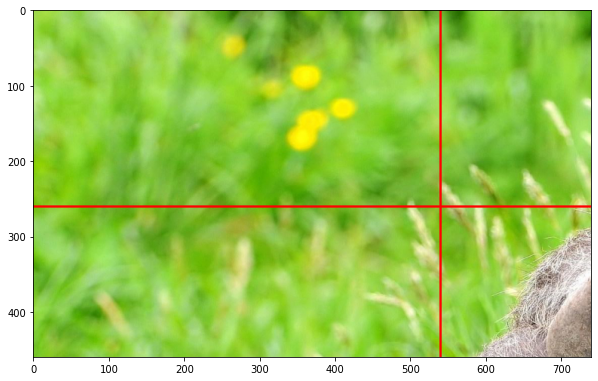

In [38]:
src = cv.imread(TEST_IMG)
if src is None:
    print('Could not open or find the image:', TEST_IMG)
    exit(0)

img = src.copy()
sift = cv.SIFT_create()

r_split, c_split, split_size = 3, 3, 100
splits = Splitter(img, r_split, c_split, split_size)
splits.show(with_lines=True, rrows=range(2, 3), rcols=range(2, 3),)
# splits.show(with_lines=True, rcols=range(0,3,2))

In [81]:
#show(self, with_lines=True, title=None, **kwargs)
# splits = split_img(img, r_split, c_split, split_size)

# sample_split = splits[0, 1]
# sample_split = cv.cvtColor(sample_split, cv.COLOR_BGR2GRAY)
# keypoints = sift.detect(sample_split)
# sample_split = cv.drawKeypoints(sample_split, keypoints, img, color = (0, 255, 0))

# splits = draw_splits(splits, split_size)
# show_splits(splits)
# show_splits(np.array([[sample_split]]), title="Split 0, 1", cmap='gray')
## Show that it is invariant

## randomly change images try to stitch